In [32]:
import numpy as np
import matplotlib.pylab as plt

In [1]:
with open("input/12", "r") as fp:
    data = fp.read()[:-1].split("\n")

In [8]:
l0 = len(data)
l1 = len(data[0])
print(l0, l1)

m = ord("a")

M = np.zeros((l0, l1))
for idx, row in enumerate(data):
    for jdx, v in enumerate(row):
        M[idx, jdx] = ord(v) - m

41 171


Also included on the heightmap are marks for your current position (S) and the location that should get the best signal (E). 

- Your current position (S) has elevation `a`, 
- the location that should get the best signal (E) has elevation `z`.

In [21]:
x0, y0 = np.where(M == ord("S") - m)
x0 = x0[0]
y0 = y0[0]


x1, y1 = np.where(M == ord("E") - m)
x1 = x1[0]
y1 = y1[0]


M[x1, y1] = 25
M[x0, y0] = 0

20 0
20 146


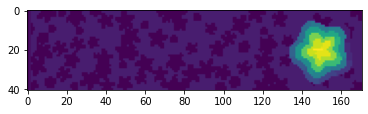

In [34]:
print(x0, y0)
print(x1, y1)

plt.imshow(M)

## Part 1

In [52]:
lst = [[x0, y0, 0]]

M_mem = np.ones((l0, l1)) * 1000000

def check(x):
    return abs(x <= 1)

cnt = 0
while len(lst) > 0:
    cnt += 1
    if cnt % 100 == 0:
        print("{}\t{} items to check".format(cnt, len(lst)))
        
        
    xx, yy, sc = lst.pop(0)
    elv = M[xx, yy]
    if M_mem[xx, yy] < sc:
        # Better path than the current found before
        continue
    
    sc1 = sc+1
    
    if xx > 0:
        if check(M[xx-1, yy] - elv) & (M_mem[xx-1, yy] > sc1):
            lst.append([xx-1, yy, sc1])
            M_mem[xx-1, yy] = sc1
            
    if yy > 0:
        if check(M[xx, yy-1] - elv) & (M_mem[xx, yy-1] > sc1):
            lst.append([xx, yy-1, sc1])
            M_mem[xx, yy-1] = sc1
        
    if xx < l0-1:
        if check(M[xx+1, yy] - elv) & (M_mem[xx+1, yy] > sc1):
            lst.append([xx+1, yy, sc1])
            M_mem[xx+1, yy] = sc1
            
    if yy < l1-1:
        if check(M[xx, yy+1] - elv) & (M_mem[xx, yy+1] > sc1):
            lst.append([xx, yy+1, sc1])
            M_mem[xx, yy+1] = sc1
            
        
        
        
        
        

100	20 items to check
200	23 items to check
300	21 items to check
400	18 items to check
500	23 items to check
600	27 items to check
700	34 items to check
800	36 items to check
900	32 items to check
1000	22 items to check
1100	19 items to check
1200	31 items to check
1300	37 items to check
1400	46 items to check
1500	38 items to check
1600	40 items to check
1700	37 items to check
1800	31 items to check
1900	27 items to check
2000	22 items to check
2100	15 items to check
2200	25 items to check
2300	28 items to check
2400	28 items to check
2500	27 items to check
2600	38 items to check
2700	37 items to check
2800	37 items to check
2900	30 items to check
3000	28 items to check
3100	28 items to check
3200	28 items to check
3300	34 items to check
3400	37 items to check
3500	38 items to check
3600	33 items to check
3700	35 items to check
3800	29 items to check
3900	31 items to check
4000	31 items to check
4100	26 items to check
4200	26 items to check
4300	24 items to check
4400	33 items to che

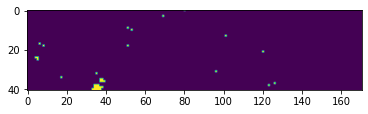

In [54]:
plt.imshow(M_mem)

In [56]:
print(M_mem[x1, y1])

520.0


---

## Part 2

In [57]:
def check(x):
    return abs(x <= 1)

def the_function(x0, y0):
    lst = [[x0, y0, 0]]

    M_mem = np.ones((l0, l1)) * 1000000

    while len(lst) > 0:
        xx, yy, sc = lst.pop(0)
        elv = M[xx, yy]
        if M_mem[xx, yy] < sc:
            # Better path than the current found before
            continue

        sc1 = sc+1

        if xx > 0:
            if check(M[xx-1, yy] - elv) & (M_mem[xx-1, yy] > sc1):
                lst.append([xx-1, yy, sc1])
                M_mem[xx-1, yy] = sc1

        if yy > 0:
            if check(M[xx, yy-1] - elv) & (M_mem[xx, yy-1] > sc1):
                lst.append([xx, yy-1, sc1])
                M_mem[xx, yy-1] = sc1

        if xx < l0-1:
            if check(M[xx+1, yy] - elv) & (M_mem[xx+1, yy] > sc1):
                lst.append([xx+1, yy, sc1])
                M_mem[xx+1, yy] = sc1

        if yy < l1-1:
            if check(M[xx, yy+1] - elv) & (M_mem[xx, yy+1] > sc1):
                lst.append([xx, yy+1, sc1])
                M_mem[xx, yy+1] = sc1

    return M_mem[x1, y1]

In [ ]:
nmin = 100000

for xb, yb in np.array(np.where(M == 0)).T:
    v = the_function(xb, yb)
    nmin = min(nmin, v)
    
print(int(nmin))